Athalia Malika N - 1301213226

Data yang digunakan: **U.S. Pollution Data**
source:https://www.kaggle.com/datasets/sogun3/uspollution

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/sogun3/uspollution')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: athaliamalika
Your Kaggle Key: ··········


100%|██████████| 25.6M/25.6M [00:00<00:00, 84.4MB/s]


In [ ]:
import pandas as pd
us_pollution1 = pd.read_csv('uspollution/pollution_us_2000_2016.csv')


In [ ]:
!pip install plotly seaborn matplotlib --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 57.4 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

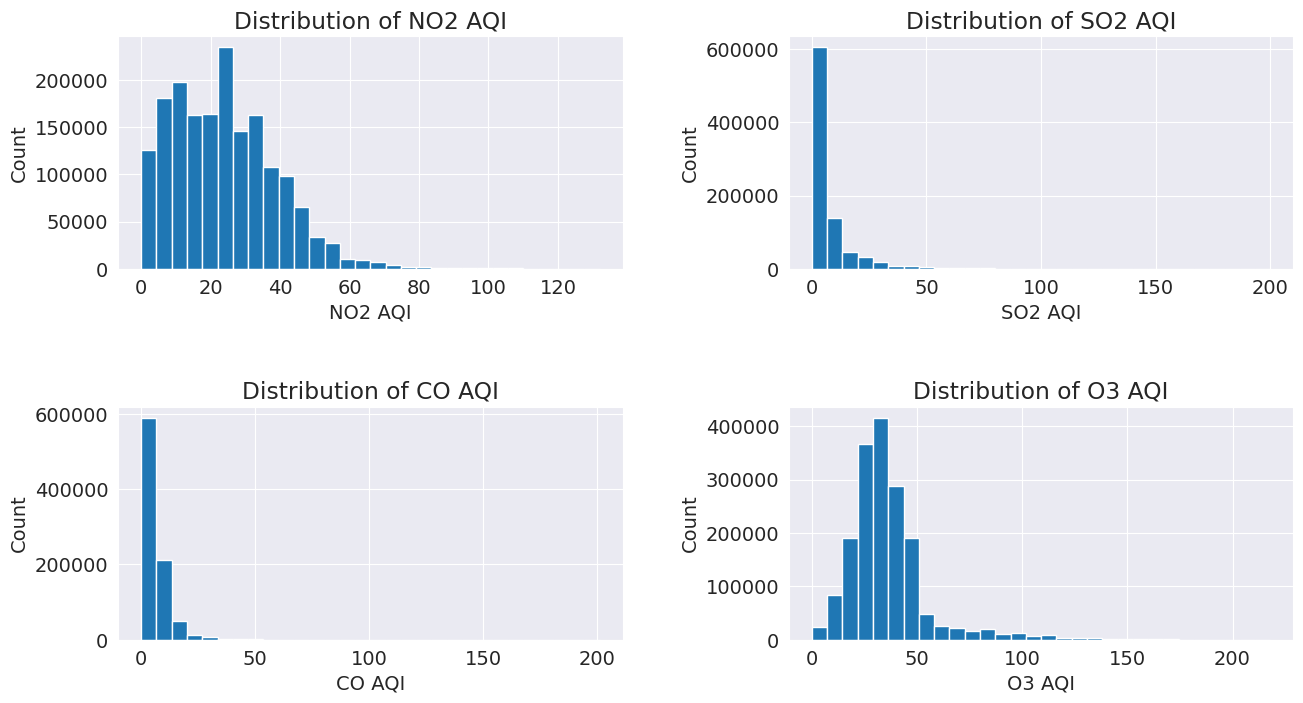

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))


axes[0,0].set_title('Distribution of NO2 AQI')
axes[0,0].hist(x=us_pollution1['NO2 AQI'], bins=30)
axes[0,0].set_xlabel('NO2 AQI')
axes[0,0].set_ylabel('Count');


axes[0,1].set_title('Distribution of SO2 AQI')
axes[0,1].hist(x=us_pollution1['SO2 AQI'],bins=30)
axes[0,1].set_xlabel('SO2 AQI')
axes[0,1].set_ylabel('Count');


axes[1,0].set_title('Distribution of CO AQI')
axes[1,0].hist(x=us_pollution1['CO AQI'],bins=30)
axes[1,0].set_xlabel('CO AQI')
axes[1,0].set_ylabel('Count');


axes[1,1].set_title('Distribution of O3 AQI')
axes[1,1].hist(x=us_pollution1['O3 AQI'],bins=30)
axes[1,1].set_xlabel('O3 AQI')
axes[1,1].set_ylabel('Count');


plt.tight_layout(pad=3);

Ketika Anda melihat distribusi SO2 dan CO AQIs, Anda akan melihat bahwa mereka tampak memiliki pencilan ekstrem dengan sebagian besar data mereka berpusat di sekitar nilai (0–20). Ini membentuk distribusi eksponensial (skew positif). Skewness secara sederhana merupakan refleksi dari kumpulan data di mana aktivitas sangat terkonsentrasi dalam satu rentang dan kurang terkonsentrasi dalam rentang lainnya. Ini berarti pencilan dari kurva distribusi lebih jauh ke kanan dan lebih dekat ke mean di sebelah kiri.

In [ ]:
us_city = us_pollution1[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI']].groupby([us_pollution1['State'], us_pollution1['City'],us_pollution1['County']]).sum()
us_city = us_city.reset_index()
us_city_highco = us_city.sort_values('CO AQI', ascending=False).head(10)
fig = px.histogram(us_city_highco, x='City', y='CO AQI', title='City with Highest Concentration of CO')
fig.show()

Phoenix, yang merupakan sebuah kota di Arizona, tampaknya memiliki konsentrasi CO tertinggi.


**Q1: Negara bagian mana yang memiliki konsentrasi tertinggi dari keempat polutan tersebut?**

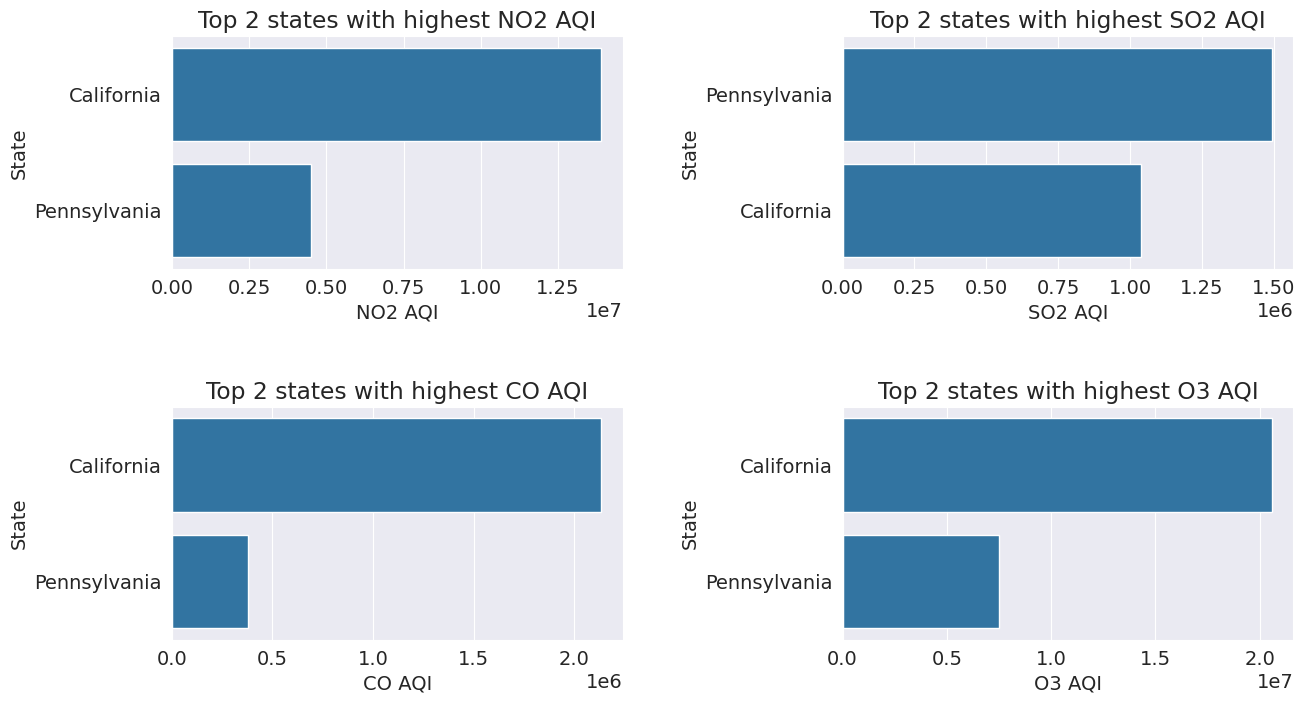

In [ ]:
# NO2
us_pollution1_no2 = us_pollution1.groupby('State')['NO2 AQI'].sum().sort_values(ascending=False).head(2)

# SO2
us_pollution1_so2 = us_pollution1.groupby('State')['SO2 AQI'].sum().sort_values(ascending=False).head(2)

# CO
us_pollution1_co = us_pollution1.groupby('State')['CO AQI'].sum().sort_values(ascending=False).head(2)

# O3
us_pollution1_o3 = us_pollution1.groupby('State')['O3 AQI'].sum().sort_values(ascending=False).head(2)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Pass the axes into seaborn

axes[0,0].set_title('Top 2 states with highest NO2 AQI')
sns.barplot(x=us_pollution1_no2,
            y=us_pollution1_no2.index, ax=axes[0,0]);

axes[0,1].set_title('Top 2 states with highest SO2 AQI')
sns.barplot(x=us_pollution1_so2,
                y=us_pollution1_so2.index,
                ax=axes[0,1]);

axes[1,0].set_title('Top 2 states with highest CO AQI')
sns.barplot(x=us_pollution1_co,
                y=us_pollution1_co.index,
                ax=axes[1,0]);

axes[1,1].set_title('Top 2 states with highest O3 AQI')
sns.barplot(x=us_pollution1_o3,
                y=us_pollution1_o3.index,
                ax=axes[1,1])


plt.tight_layout(pad=3);

Dari data di atas, dapat kita lihat bahwa untuk keempat polutan tersebut, California dan Pennsylvania berada di dua teratas. Tidak mengherankan bahwa California berada di puncak daftar ini karena merupakan negara bagian dengan populasi terbanyak di AS, sementara Pennsylvania menempati peringkat ke-5.

**Q2: Bagaimana distribusi keempat polutan tersebut di California dan Pennsylvania?**

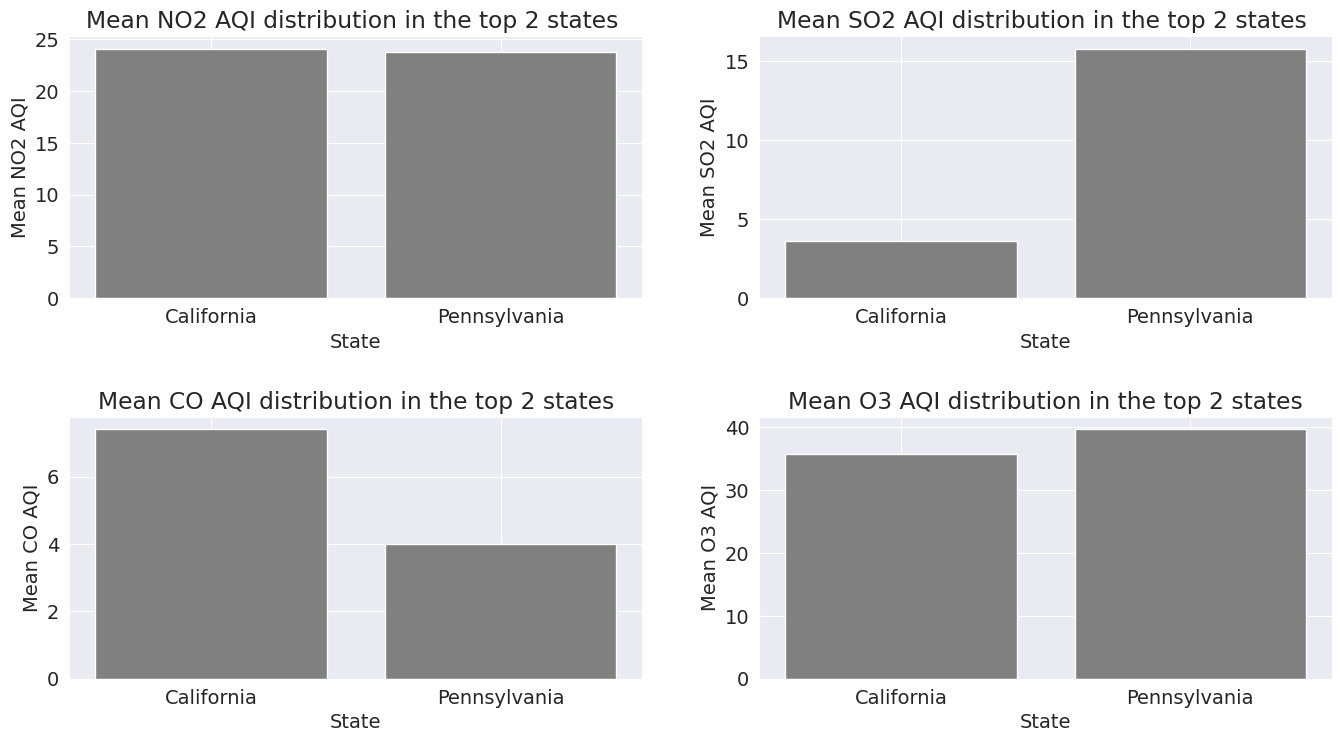

In [ ]:
us_pollution_state = us_pollution1.groupby('State')[['SO2 AQI', 'NO2 AQI', 'CO AQI', 'O3 AQI']].mean()
us_pollution_top = us_pollution_state.loc[['California','Pennsylvania']]
us_pollution_top

fig, axes = plt.subplots(2, 2, figsize=(14, 8))


axes[0,0].set_title('Mean NO2 AQI distribution in the top 2 states ')
axes[0,0].bar(x=us_pollution_top.index,
              height=us_pollution_top['NO2 AQI'],
              color='Gray')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Mean NO2 AQI');


axes[0,1].set_title('Mean SO2 AQI distribution in the top 2 states ')
axes[0,1].bar(x=us_pollution_top.index,
              height=us_pollution_top['SO2 AQI'],
              color='Gray')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Mean SO2 AQI');


axes[1,0].set_title('Mean CO AQI distribution in the top 2 states')
axes[1,0].bar(x=us_pollution_top.index,
              height=us_pollution_top['CO AQI'],
             color='Grey')
axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('Mean CO AQI');


axes[1,1].set_title('Mean O3 AQI distribution in the top 2 states')
axes[1,1].bar(x=us_pollution_top.index,
              height=us_pollution_top['O3 AQI'],
              color='Grey')
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('Mean O3 AQI');


plt.tight_layout(pad=2);


Negara-negara bagian tersebut menunjukkan rata-rata AQI yang relatif rendah, dengan nilai kurang dari 50. Ini menandakan bahwa ada sedikit atau tidak ada risiko polusi udara di wilayah-wilayah ini. Namun, nilai harian harus dipelajari untuk memahami tingkat konsentrasi polutan ini dan dampak kesehatannya.

**Q3: Apakah ada hubungan antara polutan-polutan tersebut? Jika ada, bagaimana perubahan hubungannya dari waktu ke waktu di California dan Pennsylvania?**

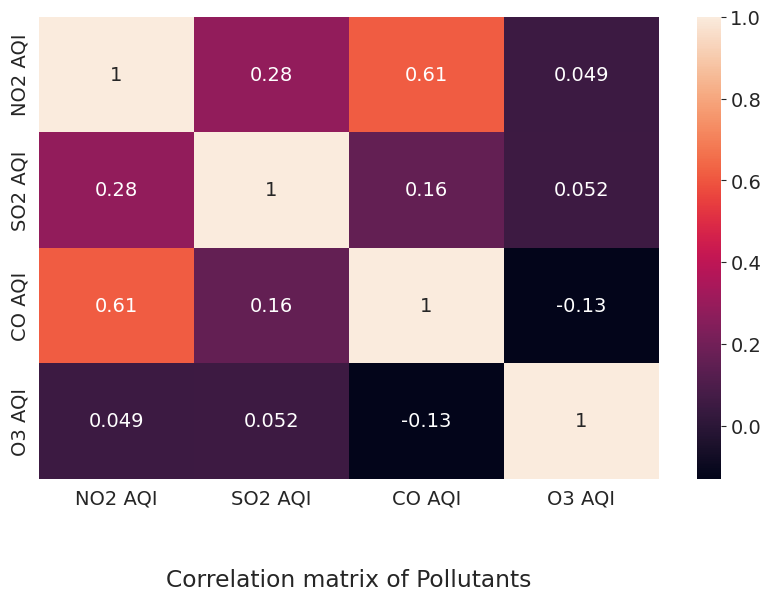

In [ ]:
us_pollution1_pol = us_pollution1[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI']]

correlation_mat = us_pollution1_pol.corr()

plt.figure(figsize=(10,6))
plt.title("Correlation matrix of Pollutants", y=-0.25)
sns.heatmap(correlation_mat, annot = True);

Sekarang kita bisa melihat bahwa CO dan NO2 adalah pasangan korelasi yang kuat (dengan koefisien korelasi lebih dari 0.6). Ini berarti ketika nilai CO meningkat, nilai NO2 juga meningkat secara serupa. Hal ini bisa disebabkan karena keduanya memiliki sumber polusi yang sama, yang utamanya berasal dari pembakaran bahan bakar.

In [ ]:
import pandas as pd

# Convert 'Date Local' to datetime and extract 'Month' and 'Year'
us_pollution1['Date Local'] = pd.to_datetime(us_pollution1['Date Local'])
us_pollution1['Month'] = us_pollution1['Date Local'].dt.month
us_pollution1['Year'] = us_pollution1['Date Local'].dt.year

import plotly.express as px

# Assuming 'Year' is the name of the column representing time
us_pol = us_pollution1.query("State in ('California','Pennsylvania') and Year >= 2000 and Year <= 2010")

fig = px.scatter(us_pol, x='NO2 AQI', y='CO AQI',
                 color='State', animation_frame='Year',
                 title='Growth pattern of CO and NO2 Overtime in California and Pennsylvania (2005 - 2015)')

fig.show()


Dari plot ini, kita dapat melihat bahwa California memiliki sejumlah pencilan. Ini mungkin menjadi alasan mengapa ada jumlah polutan yang tidak proporsional di California dibandingkan dengan kebanyakan negara bagian lainnya. Pencilan tersebut dapat mencerminkan kesalahan pengukuran atau kejadian polusi udara yang tidak biasa. Evaluasi tambahan menggunakan pengetahuan ahli diperlukan untuk menentukan perlakuan terhadap pencilan yang teridentifikasi.

**Q4: Apakah tren tahunan antara polutan tersebut? Apakah terjadi tren naik atau turun dalam tingkat polusi?**

In [ ]:
import pandas as pd

# Assuming 'Date Local' is the name of the column containing dates in the format 'yyyy-mm-dd'
us_pol['Year'] = pd.to_datetime(us_pol['Date Local']).dt.year


<ipython-input-36-b8a55f29ec1f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd

# Assuming 'Date Local' is the name of the column containing dates in the format 'yyyy-mm-dd'
us_pol['Year'] = pd.to_datetime(us_pol['Date Local']).dt.year

# Now, you can use the 'Year' column within your DataFrame
print(us_pol['Year'])


3516       2000
3517       2000
3518       2000
3519       2000
3520       2000
           ... 
1742892    2016
1742893    2016
1742894    2016
1742895    2016
1742896    2016
Name: Year, Length: 765034, dtype: int64


<ipython-input-38-fb490332983f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



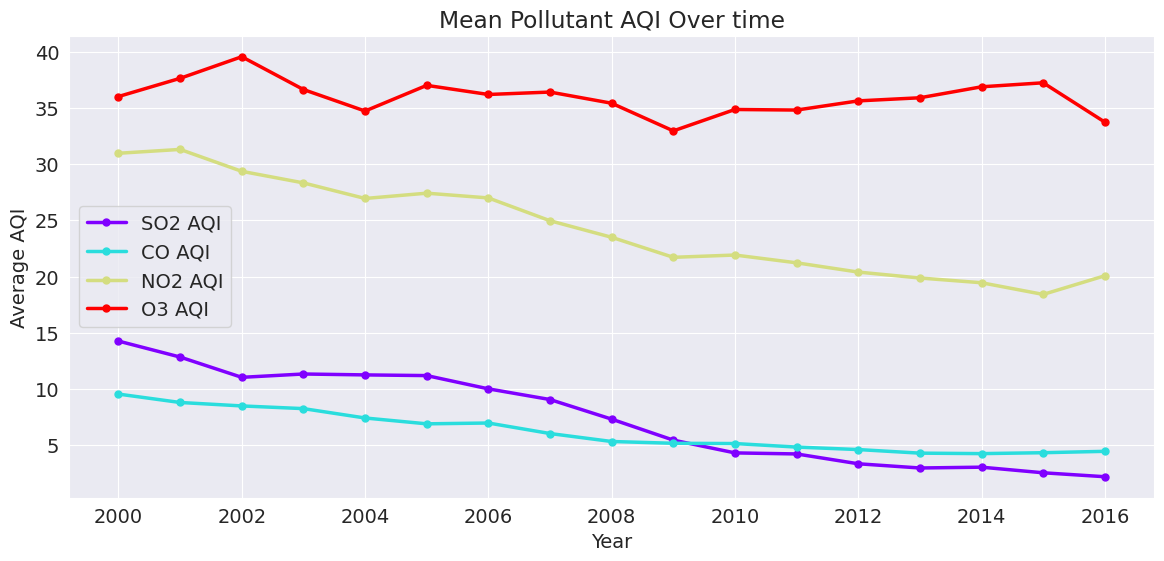

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Date Local' is the name of the column containing dates in the format 'yyyy-mm-dd'
us_pollution1['Year'] = pd.to_datetime(us_pollution1['Date Local']).dt.year

# Plot the aggregate of all four pollutants
f, ax = plt.subplots(figsize=[14, 6])
us_pollution1.groupby(['Year']).agg({'SO2 AQI': 'mean',
                                     'CO AQI': 'mean',
                                     'NO2 AQI': 'mean',
                                     'O3 AQI': 'mean'})\
.plot(colormap='rainbow', marker='.', markersize=10, ax=ax, linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over time')
ax.set_xlabel('Year')
ax.set_ylabel('Average AQI')
plt.show()


Tren semua polutan, kecuali untuk Ozon, yang terus fluktuatif, menunjukkan penurunan, menandakan bahwa kualitas udara di Amerika Serikat telah membaik dari tahun ke tahun.

# Monthly Trend


**Q5: Bagaimana tren bulanan ozon (O3) pada tahun 2016 di California?**

In [ ]:
import pandas as pd

# Convert 'Date Local' to datetime and extract 'Month' and 'Year'
us_pollution1['Date Local'] = pd.to_datetime(us_pollution1['Date Local'])
us_pollution1['Month'] = us_pollution1['Date Local'].dt.month
us_pollution1['Year'] = us_pollution1['Date Local'].dt.year

In [ ]:


# Filter data for California in 2016
us_ozone_cali16 = us_pollution1.query('Year == 2016 and State =="California"')

# Using Plotly as a plotting backend for Pandas
pd.options.plotting.backend = "plotly"

# Plot boxplot
us_ozone_cali16.plot(x='Month',
                     y='O3 AQI',
                     kind='box',
                     title='Concentrations of Ozone by month in California in the year 2016')


Di California, indeks kualitas udara untuk ozon (O3) tampaknya mengalami peningkatan dari Januari hingga April.

Catatan: Tren untuk sisa tahun tersebut tidak diketahui dan hal ini bisa disebabkan oleh waktu pembuatan dataset ini.

# Summary

Pada akhir proyek ini, kami berhasil membuat beberapa inferensi sebagai berikut:

1. Dataset yang digunakan untuk proyek ini memiliki total 28 kolom. Empat polutan (NO2, SO2, CO, dan O3) masing-masing memiliki 5 kolom spesifik. Observasi total lebih dari 1,7 juta.
2. Dataset ini memiliki data untuk hanya 47 negara bagian, dari 51 negara bagian di AS.
3. Dalam dataset asli, lebih dari 50% nilai untuk SO2 AQI dan CO AQI hilang, dan alasan untuk ini tidak diketahui. Namun, untuk keperluan analisis ini, kami menggunakan metode imputasi (interpolasi linear) untuk mengisi nilai-nilai yang hilang tersebut.
4. SO2 dan CO memiliki distribusi eksponensial. Mereka tampak memiliki pencilan yang lebih ekstrem. Konsekuensi dari hal ini terhadap kesehatan manusia jarang diketahui.
5. Phoenix, yang merupakan kota di Arizona, tampaknya memiliki konsentrasi CO tertinggi kedua. Kota dengan nilai tertinggi tidak diketahui.
6. California dan Pennsylvania adalah negara bagian dengan konsentrasi polutan tertinggi, dan ini tidak mengherankan karena California adalah negara bagian dengan populasi terbanyak di AS, sementara Pennsylvania berada di urutan ke-5.
7. Negara bagian (California dan Pennsylvania) menunjukkan rata-rata AQI yang relatif rendah, dengan nilai kurang dari 50, yang secara umum berarti kualitas udara memuaskan dan polusi udara tidak menimbulkan risiko besar atau sama sekali. Namun, tingkat konsentrasi harian perlu diamati untuk memahami tingkat polusi.
8. CO dan NO2 memiliki korelasi positif yang kuat (dengan koefisien korelasi lebih dari 0,6). Ini berarti peningkatan nilai salah satunya menghasilkan peningkatan nilai yang serupa pada yang lain.
9. Trend dari semua polutan, kecuali Ozone, yang terus berfluktuasi, menurun, menandakan bahwa kualitas udara di Amerika Serikat telah membaik dari tahun ke tahun.
10. Baik di California maupun Pennsylvania, ozon (O3) adalah satu-satunya polutan yang mencapai tingkat yang tidak normal dengan AQI lebih dari 200.
11. Baik di California maupun Pennsylvania, indeks kualitas udara untuk ozon (O3) cenderung meningkat saat berpindah dari bulan yang lebih dingin ke bulan yang lebih hangat.
